Import packages

In [1]:
from dataretrieval import nwis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

current_datetime = datetime.datetime.now()
print(current_datetime)

2025-01-05 10:15:38.068620


Identify USGS site IDs

In [2]:
siteNumber = ["12305000","06038800", "13340600", "13092747","13311000"]
parameterCode = "00060" # Discharge
startDate = "1990-10-01"
endDate = "2024-09-30"

Retrive site infomation

In [3]:
site_info = nwis.get_info(sites= siteNumber )

site_info_df = pd.DataFrame( site_info[0] )

print( site_info_df )

#print( site_info_df.columns )

site_info_df["site_no"]=site_info_df["site_no"].astype(str)

columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va']

filtered_df = site_info_df[columns_to_save]

filtered_df.to_csv('site_info_df.csv', index=False)


  agency_cd   site_no                                       station_nm  \
0      USGS  06038800       Madison River at Kirby Ranch nr Cameron MT   
1      USGS  12305000                     KOOTENAI RIVER AT LEONIA, ID   
2      USGS  13092747    ROCK CREEK AB HWY 30/93 XING AT TWIN FALLS ID   
3      USGS  13311000            EF OF SF SALMON RIVER AT STIBNITE, ID   
4      USGS  13340600  NF CLEARWATER RIVER NR CANYON RANGER STATION ID   

  site_tp_cd     lat_va     long_va  dec_lat_va  dec_long_va coord_meth_cd  \
0         ST  445319.16  1113451.19   44.888656  -111.580886             N   
1         ST  483700.78  1160257.10   48.616883  -116.049194             N   
2         ST  423345.00  1142941.00   42.562500  -114.494722             M   
3         ST  445420.60  1151946.20   44.905722  -115.329500             N   
4         ST  465026.00  1153716.00   46.840556  -115.621111             G   

  coord_acy_cd  ... local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  \
0        

Extract stream temp data

In [4]:
parameterCode = "00010" 

dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print( dailyStreamtemp_df)

#print( dailyStreamtemp_df.dtypes)
#print( type(dailyStreamtemp_df[["Date"]]) )

        site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
0      06038800 1995-04-12 00:00:00+00:00            5.5                A   
1      06038800 1995-04-13 00:00:00+00:00            6.5                A   
2      06038800 1995-04-14 00:00:00+00:00            6.0                A   
3      06038800 1995-04-15 00:00:00+00:00            6.5                A   
4      06038800 1995-04-16 00:00:00+00:00            6.5                A   
...         ...                       ...            ...              ...   
33342  13340600 2024-09-26 00:00:00+00:00           14.7                A   
33343  13340600 2024-09-27 00:00:00+00:00           14.4                A   
33344  13340600 2024-09-28 00:00:00+00:00           14.2                A   
33345  13340600 2024-09-29 00:00:00+00:00           14.1                A   
33346  13340600 2024-09-30 00:00:00+00:00           12.5                A   

       00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd        Date

Identify the minimum date of stream temp

In [5]:
min_dailyStreamtemp_date = str( dailyStreamtemp_df["Date"].iloc[0] )
print(  
   min_dailyStreamtemp_date 
 
)
print( type(  min_dailyStreamtemp_date )    )

1995-04-12
<class 'str'>


extract streamflow data

In [6]:
parameterCode = "00060" 
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start= min_dailyStreamtemp_date , end=endDate) 
#print(dailyStreamflow)
#print( type(dailyStreamflow) )

dailyStreamflow_df = pd.DataFrame( dailyStreamflow[0] )
dailyStreamflow_df =dailyStreamflow_df .reset_index()


# Convert datetime to date (remove the time part)
dailyStreamflow_df['Date'] = dailyStreamflow_df['datetime'].dt.date
dailyStreamflow_df['Month'] = dailyStreamflow_df['datetime'].dt.month
dailyStreamflow_df['Year'] = dailyStreamflow_df['datetime'].dt.year

dailyStreamflow_df = dailyStreamflow_df[ dailyStreamflow_df['Month'].isin( [6,7,8] )    ]

print(dailyStreamflow_df)

        site_no                  datetime  00060_Mean 00060_Mean_cd  \
50     06038800 1995-06-01 00:00:00+00:00      2510.0             A   
51     06038800 1995-06-02 00:00:00+00:00      2570.0             A   
52     06038800 1995-06-03 00:00:00+00:00      2750.0             A   
53     06038800 1995-06-04 00:00:00+00:00      2850.0             A   
54     06038800 1995-06-05 00:00:00+00:00      2870.0             A   
...         ...                       ...         ...           ...   
49040  13340600 2024-08-27 00:00:00+00:00       717.0             A   
49041  13340600 2024-08-28 00:00:00+00:00       718.0             A   
49042  13340600 2024-08-29 00:00:00+00:00       718.0             A   
49043  13340600 2024-08-30 00:00:00+00:00       701.0             A   
49044  13340600 2024-08-31 00:00:00+00:00       678.0             A   

             Date  Month  Year  
50     1995-06-01      6  1995  
51     1995-06-02      6  1995  
52     1995-06-03      6  1995  
53     1995-06-

GEE PRISM: https://code.earthengine.google.com/12de9c666ea94a1111f489bea638dd58

In [7]:

shared_url = "https://drive.google.com/file/d/1fAeIzkP8cRqY3iFmFHa9TbBKoE6lxQJh/view?usp=share_link"

# Extract the file ID
file_id = shared_url.split('/d/')[1].split('/')[0]

# Create the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a pandas DataFrame
prism_df = pd.read_csv(download_url)

prism_df['date'] = pd.to_datetime( prism_df['date'])

def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days
    # Adjust for negative values (wrap-around)
    return days_difference if days_difference >= 0 else days_difference + 365

# Apply the function to calculate days since October 1st
prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)

prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365

prism_df["site_no"] =prism_df["site_no"].astype(str)

# Add a leading 0 to strings with exactly 7 characters
prism_df['site_no'] = prism_df['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

prism_df["site_no"] =prism_df["site_no"].astype(str)

print( prism_df)

print( prism_df.dtypes )

print(  prism_df["site_no"].unique()  )

print(siteNumber)

            date      tmean   site_no  Days_Since_October_1st     rad_d
0     1995-01-01 -18.306002  06038800                      92  1.583707
1     1995-01-02 -17.829000  06038800                      93  1.600921
2     1995-01-03 -18.317001  06038800                      94  1.618135
3     1995-01-04 -15.904000  06038800                      95  1.635350
4     1995-01-05 -11.903001  06038800                      96  1.652564
...          ...        ...       ...                     ...       ...
54395 2024-10-10   9.048050  13311000                       9  0.154928
54396 2024-10-11   9.102850  13311000                      10  0.172142
54397 2024-10-12   9.169550  13311000                      11  0.189356
54398 2024-10-13  10.279050  13311000                      12  0.206570
54399 2024-10-14  10.417600  13311000                      13  0.223785

[54400 rows x 5 columns]
date                      datetime64[ns]
tmean                            float64
site_no                     

12305000
<class 'str'>
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
32640 1995-01-01 -10.211000  12305000                      92  1.583707   
32641 1995-01-02 -10.491000  12305000                      93  1.600921   
32642 1995-01-03 -11.349001  12305000                      94  1.618135   
32643 1995-01-04 -11.882001  12305000                      95  1.635350   
32644 1995-01-05 -11.491000  12305000                      96  1.652564   
...          ...        ...       ...                     ...       ...   
43515 2024-10-10  10.007200  12305000                       9  0.154928   
43516 2024-10-11   8.662700  12305000                      10  0.172142   
43517 2024-10-12   9.974999  12305000                      11  0.189356   
43518 2024-10-13  11.141400  12305000                      12  0.206570   
43519 2024-10-14  13.207850  12305000                      13  0.223785   

       sin_rday  cos_rday  
32640  0.999917 -0.012910  
32641  0.999546 -0.0

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

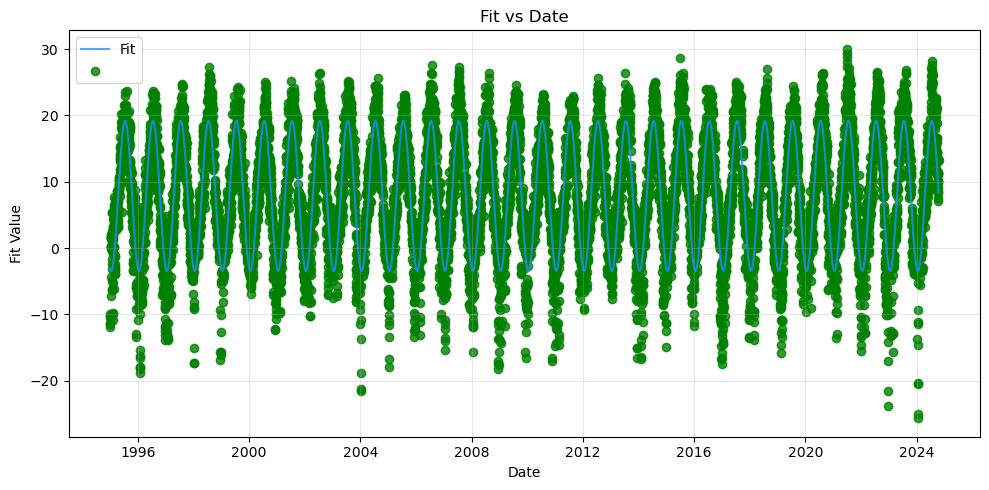

dailyStreamtemp_df2:         site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
8485   12305000 2011-09-30 00:00:00+00:00           14.4                A   
8486   12305000 2011-10-01 00:00:00+00:00           15.5                A   
8487   12305000 2011-10-02 00:00:00+00:00           15.5                A   
8488   12305000 2011-10-03 00:00:00+00:00           15.5                A   
8489   12305000 2011-10-04 00:00:00+00:00           14.5                A   
...         ...                       ...            ...              ...   
12896  12305000 2024-09-26 00:00:00+00:00           15.7                P   
12897  12305000 2024-09-27 00:00:00+00:00           14.3                P   
12898  12305000 2024-09-28 00:00:00+00:00           14.1                P   
12899  12305000 2024-09-29 00:00:00+00:00           14.2                P   
12900  12305000 2024-09-30 00:00:00+00:00           13.6                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 0001

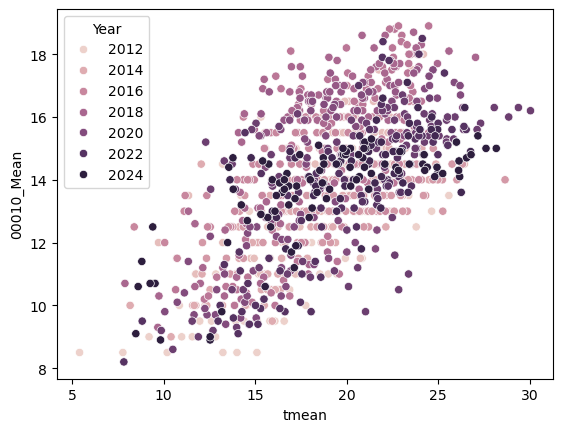

<Figure size 800x600 with 0 Axes>

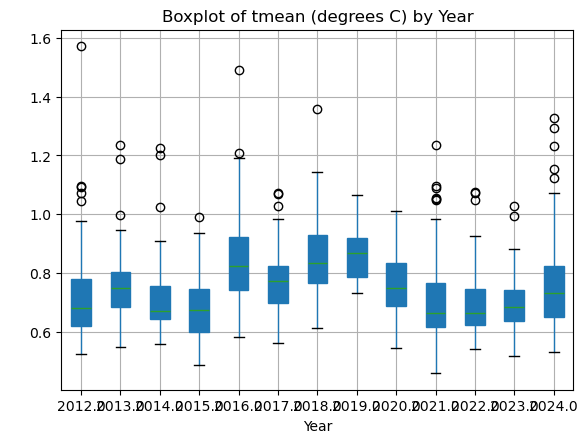

Year
2012.0    0.681243
2013.0    0.750402
2014.0    0.672579
2015.0    0.675250
2016.0    0.824091
2017.0    0.771964
2018.0    0.834855
2019.0    0.867396
2020.0    0.751100
2021.0    0.664454
2022.0    0.664949
2023.0    0.684794
2024.0    0.731873
Name: w_a, dtype: float64
Year
1995    1260.0
1996    1260.0
1997    1655.0
1998    1890.0
1999    2385.0
2000    1260.0
2001     964.5
2002    1420.0
2003    1260.0
2004    1110.0
2005    1170.0
2006    1335.0
2007    1120.0
2008    2085.0
2009    1350.0
2010    1315.0
2011    1410.0
2012    1210.0
2013     840.5
2014    1120.0
2015     869.0
2016     930.0
2017    1190.0
2018    1240.0
2019    1150.0
2020    1090.0
2021    1004.0
2022    1190.0
2023    1060.0
2024    1055.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
2012.0  0.681243      1210.0  7.098376
2013.0  0.750402       840.5  6.733997
2014.0  0.672579      1120.0  7.021084
2015.0  0.675250       869.0  6.767343


/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

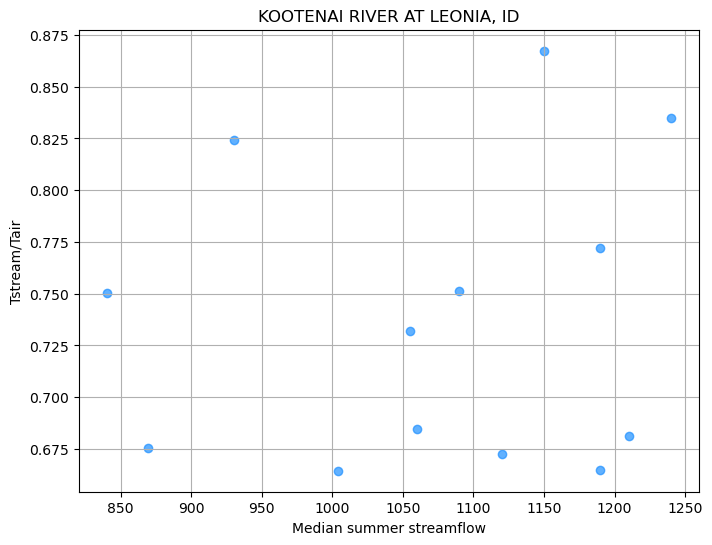

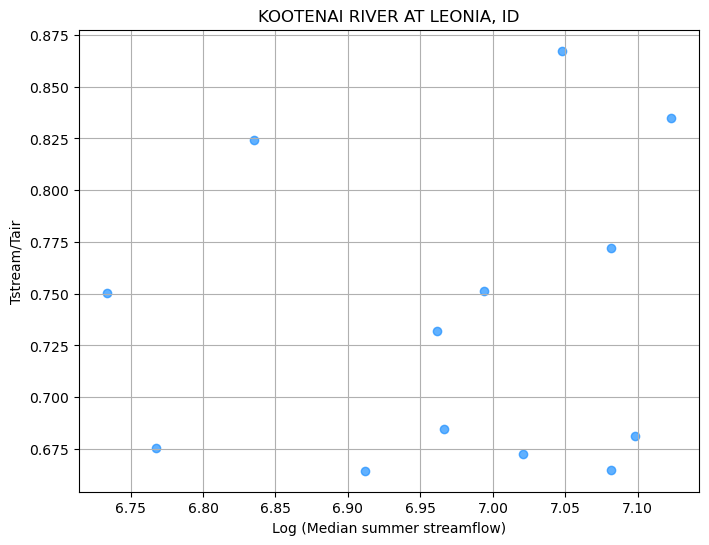

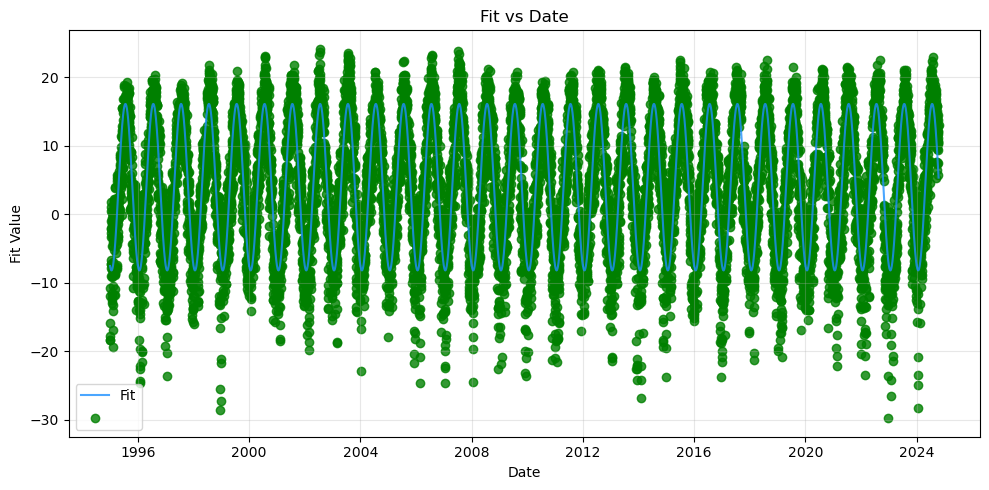

dailyStreamtemp_df2:        site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
0     06038800 1995-04-12 00:00:00+00:00            5.5                A   
1     06038800 1995-04-13 00:00:00+00:00            6.5                A   
2     06038800 1995-04-14 00:00:00+00:00            6.0                A   
3     06038800 1995-04-15 00:00:00+00:00            6.5                A   
4     06038800 1995-04-16 00:00:00+00:00            6.5                A   
...        ...                       ...            ...              ...   
8480  06038800 2024-09-26 00:00:00+00:00           16.8                A   
8481  06038800 2024-09-27 00:00:00+00:00           17.1                A   
8482  06038800 2024-09-28 00:00:00+00:00           17.3                A   
8483  06038800 2024-09-29 00:00:00+00:00           16.6                A   
8484  06038800 2024-09-30 00:00:00+00:00           14.4                A   

      00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd    

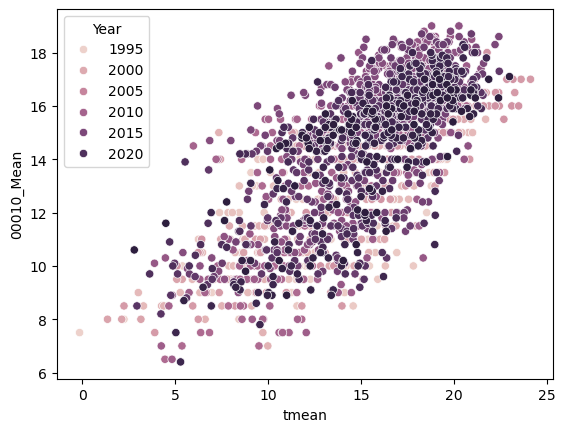

<Figure size 800x600 with 0 Axes>

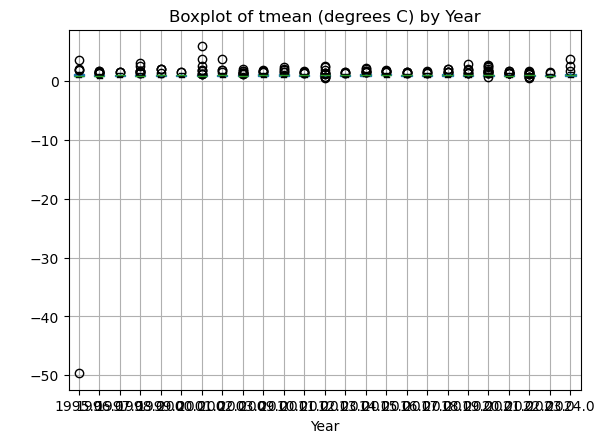

Year
1995.0    0.908140
1996.0    0.873438
1997.0    0.944034
1998.0    0.893234
1999.0    0.917260
2000.0    0.914108
2001.0    0.903202
2002.0    0.917553
2003.0    0.850294
2009.0    0.955188
2010.0    0.994786
2011.0    0.970949
2012.0    0.959726
2013.0    0.963050
2014.0    1.009256
2015.0    1.014328
2016.0    0.918974
2017.0    0.974333
2018.0    0.958147
2019.0    0.934779
2020.0    0.929997
2021.0    0.889530
2022.0    0.941549
2023.0    0.896517
2024.0    0.930240
Name: w_a, dtype: float64
Year
1995    1260.0
1996    1260.0
1997    1655.0
1998    1890.0
1999    2385.0
2000    1260.0
2001     964.5
2002    1420.0
2003    1260.0
2004    1110.0
2005    1170.0
2006    1335.0
2007    1120.0
2008    2085.0
2009    1350.0
2010    1315.0
2011    1410.0
2012    1210.0
2013     840.5
2014    1120.0
2015     869.0
2016     930.0
2017    1190.0
2018    1240.0
2019    1150.0
2020    1090.0
2021    1004.0
2022    1190.0
2023    1060.0
2024    1055.0
Name: 00060_Mean, dtype: float64
      

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

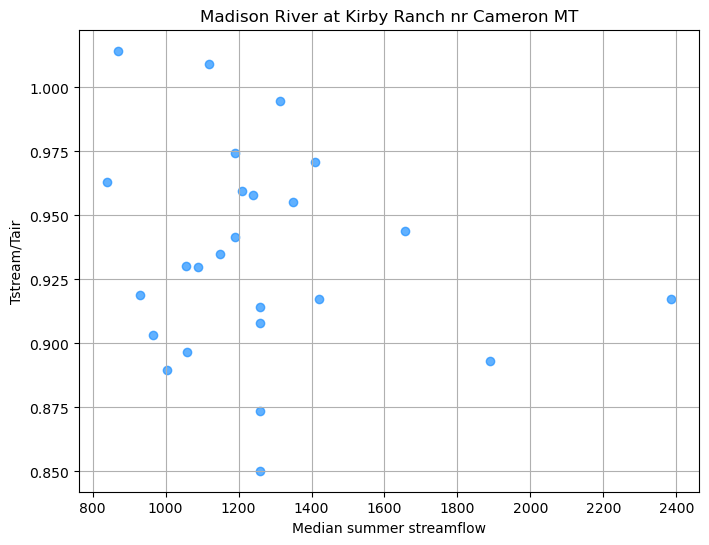

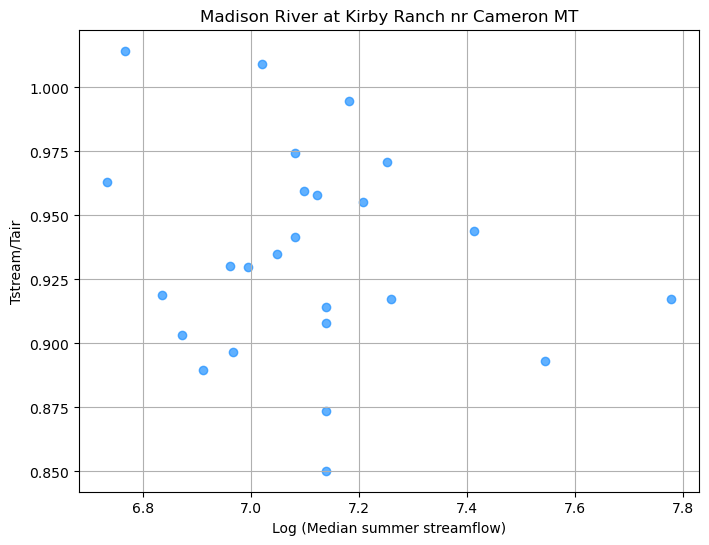

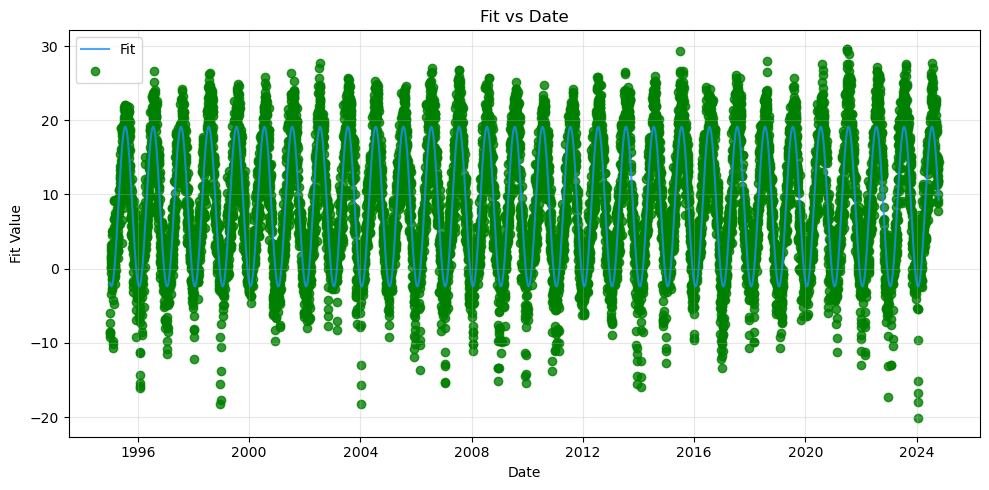

dailyStreamtemp_df2:         site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
21320  13340600 1990-10-01 00:00:00+00:00           12.0                A   
21321  13340600 1990-10-02 00:00:00+00:00           11.5                A   
21322  13340600 1990-10-03 00:00:00+00:00           10.5                A   
21323  13340600 1990-10-04 00:00:00+00:00           10.0                A   
21324  13340600 1990-10-05 00:00:00+00:00           10.5                A   
...         ...                       ...            ...              ...   
33342  13340600 2024-09-26 00:00:00+00:00           14.7                A   
33343  13340600 2024-09-27 00:00:00+00:00           14.4                A   
33344  13340600 2024-09-28 00:00:00+00:00           14.2                A   
33345  13340600 2024-09-29 00:00:00+00:00           14.1                A   
33346  13340600 2024-09-30 00:00:00+00:00           12.5                A   

       00010_Minimum 00010_Minimum_cd  00010_Mean 0001

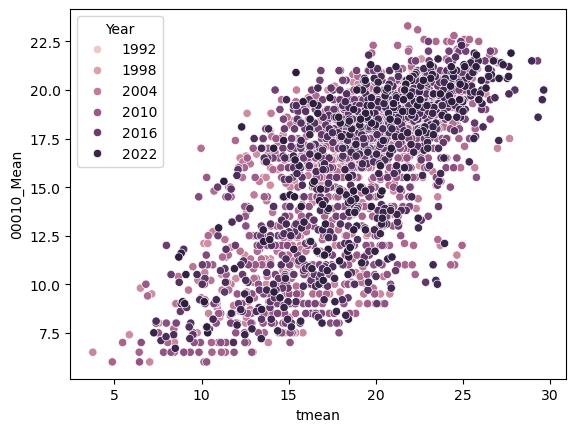

<Figure size 800x600 with 0 Axes>

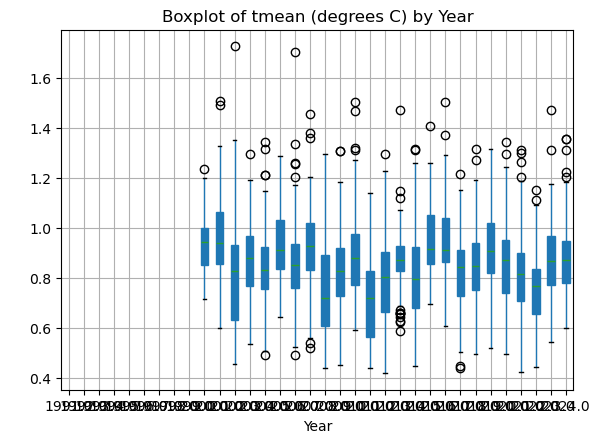

Year
1991.0         NaN
1992.0         NaN
1993.0         NaN
1994.0         NaN
1995.0         NaN
1996.0         NaN
1997.0         NaN
1998.0         NaN
1999.0         NaN
2000.0    0.945717
2001.0    0.941403
2002.0    0.829366
2003.0    0.879105
2004.0    0.831579
2005.0    0.912964
2006.0    0.853030
2007.0    0.926835
2008.0    0.722268
2009.0    0.827619
2010.0    0.879745
2011.0    0.721532
2012.0    0.804926
2013.0    0.873576
2014.0    0.795045
2015.0    0.916941
2016.0    0.913689
2017.0    0.845080
2018.0    0.850096
2019.0    0.909377
2020.0    0.872403
2021.0    0.818243
2022.0    0.768775
2023.0    0.869211
2024.0    0.874611
Name: w_a, dtype: float64
Year
1995    1260.0
1996    1260.0
1997    1655.0
1998    1890.0
1999    2385.0
2000    1260.0
2001     964.5
2002    1420.0
2003    1260.0
2004    1110.0
2005    1170.0
2006    1335.0
2007    1120.0
2008    2085.0
2009    1350.0
2010    1315.0
2011    1410.0
2012    1210.0
2013     840.5
2014    1120.0
2015     869.0
201

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

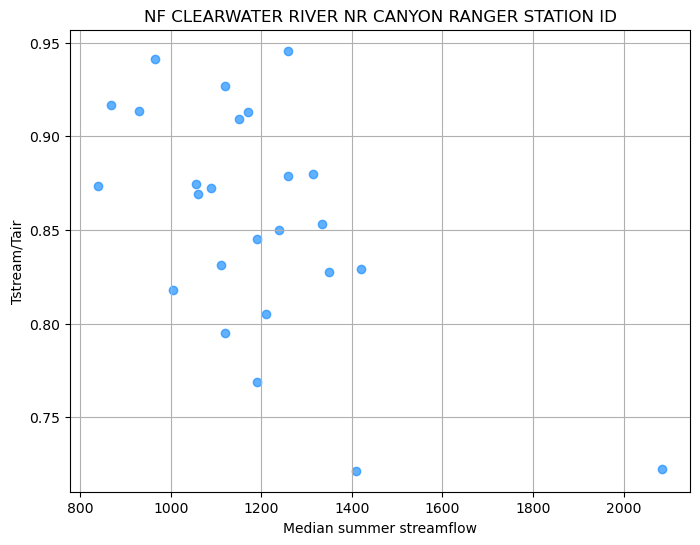

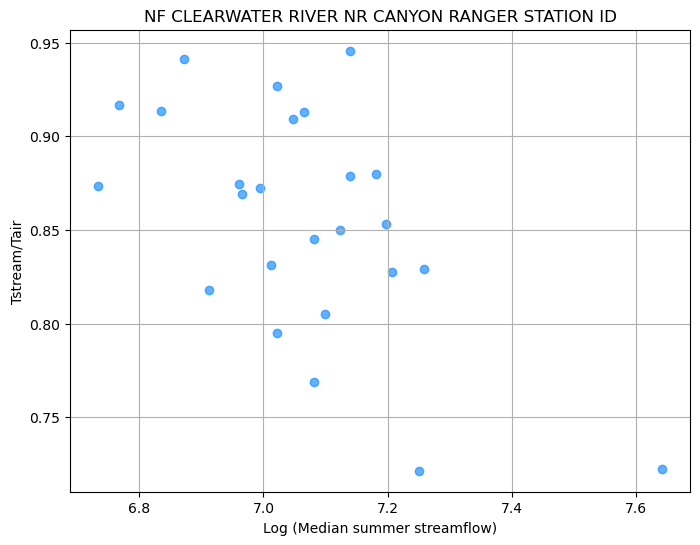

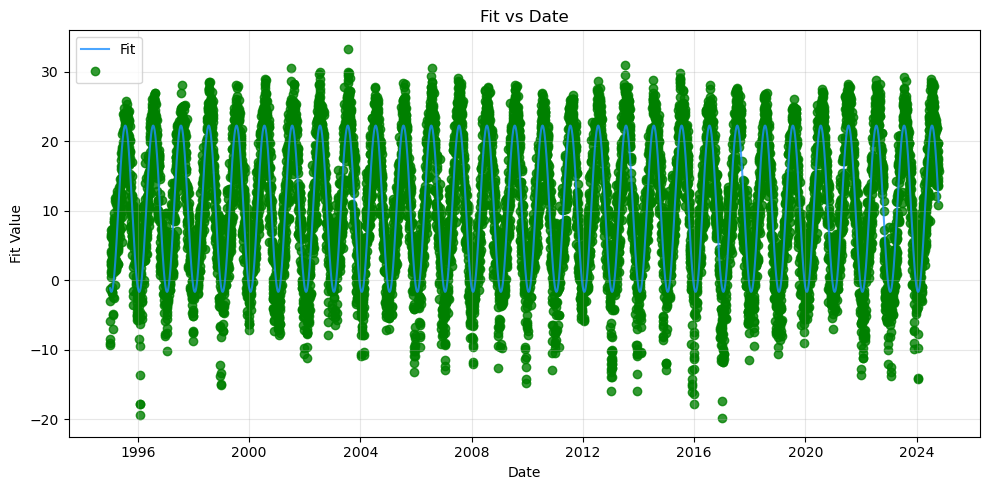

dailyStreamtemp_df2:         site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
12901  13092747 1993-04-07 00:00:00+00:00           11.0                A   
12902  13092747 1993-04-08 00:00:00+00:00           12.5                A   
12903  13092747 1993-04-09 00:00:00+00:00           12.0                A   
12904  13092747 1993-04-10 00:00:00+00:00           10.0                A   
12905  13092747 1993-04-11 00:00:00+00:00            9.5                A   
...         ...                       ...            ...              ...   
18341  13092747 2024-09-26 00:00:00+00:00           15.9                P   
18342  13092747 2024-09-27 00:00:00+00:00           15.7                P   
18343  13092747 2024-09-28 00:00:00+00:00           15.9                P   
18344  13092747 2024-09-29 00:00:00+00:00           16.0                P   
18345  13092747 2024-09-30 00:00:00+00:00           15.0                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 0001

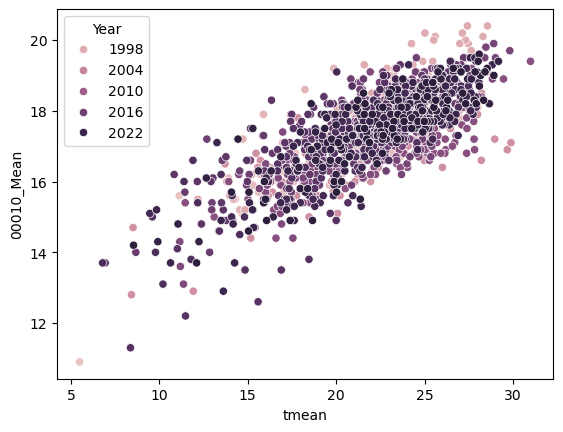

<Figure size 800x600 with 0 Axes>

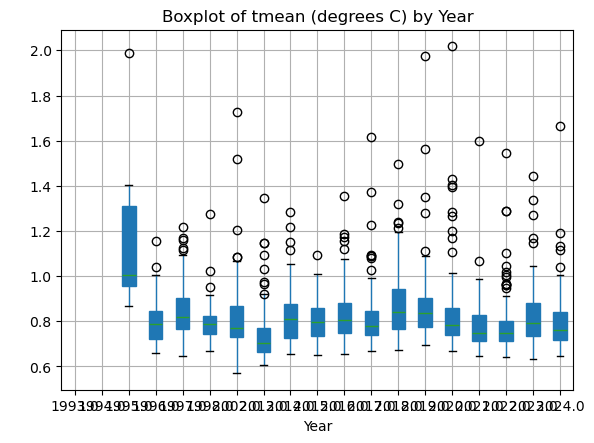

Year
1993.0         NaN
1994.0         NaN
1995.0    1.003787
1996.0    0.786716
1997.0    0.819789
1998.0    0.788132
2002.0    0.771356
2013.0    0.704713
2014.0    0.809896
2015.0    0.796373
2016.0    0.804689
2017.0    0.780444
2018.0    0.841669
2019.0    0.835273
2020.0    0.783818
2021.0    0.747581
2022.0    0.750347
2023.0    0.794440
2024.0    0.762372
Name: w_a, dtype: float64
Year
1995    1260.0
1996    1260.0
1997    1655.0
1998    1890.0
1999    2385.0
2000    1260.0
2001     964.5
2002    1420.0
2003    1260.0
2004    1110.0
2005    1170.0
2006    1335.0
2007    1120.0
2008    2085.0
2009    1350.0
2010    1315.0
2011    1410.0
2012    1210.0
2013     840.5
2014    1120.0
2015     869.0
2016     930.0
2017    1190.0
2018    1240.0
2019    1150.0
2020    1090.0
2021    1004.0
2022    1190.0
2023    1060.0
2024    1055.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
1995.0  1.003787      1260.0  7.138867
199

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_84428/865607693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

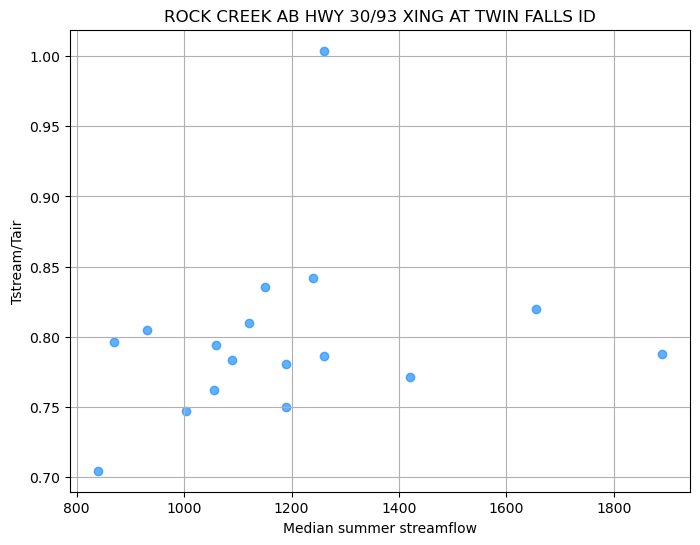

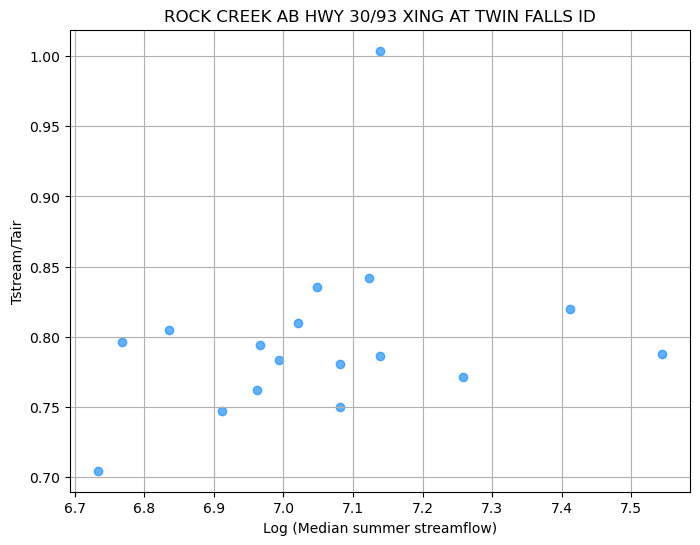

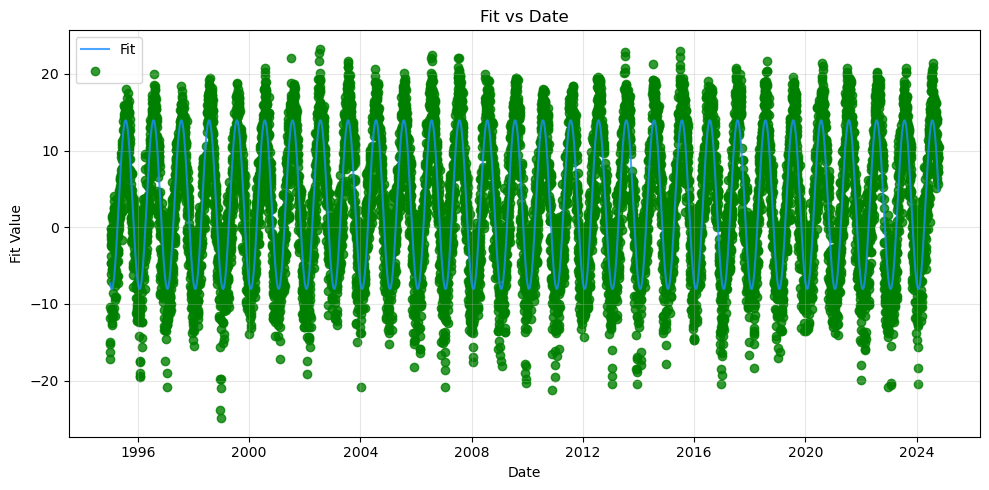

dailyStreamtemp_df2:         site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
18346  13311000 2011-09-21 00:00:00+00:00           11.0                A   
18347  13311000 2011-09-22 00:00:00+00:00           11.1                A   
18348  13311000 2011-09-23 00:00:00+00:00           11.5                A   
18349  13311000 2011-09-24 00:00:00+00:00           11.5                A   
18350  13311000 2011-09-25 00:00:00+00:00           10.5                A   
...         ...                       ...            ...              ...   
21315  13311000 2024-09-26 00:00:00+00:00           11.2                P   
21316  13311000 2024-09-27 00:00:00+00:00           10.7                P   
21317  13311000 2024-09-28 00:00:00+00:00           10.9                P   
21318  13311000 2024-09-29 00:00:00+00:00           10.1                P   
21319  13311000 2024-09-30 00:00:00+00:00            7.5                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 0001

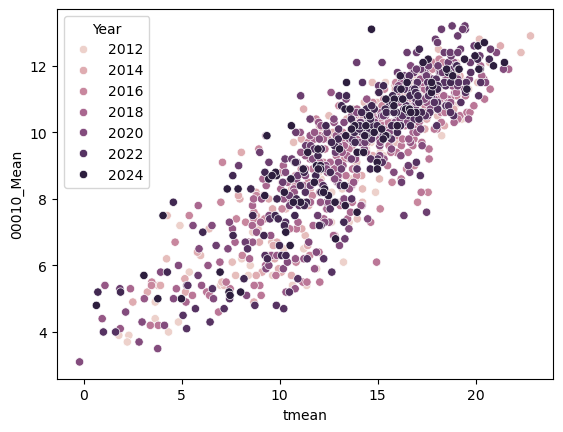

<Figure size 800x600 with 0 Axes>

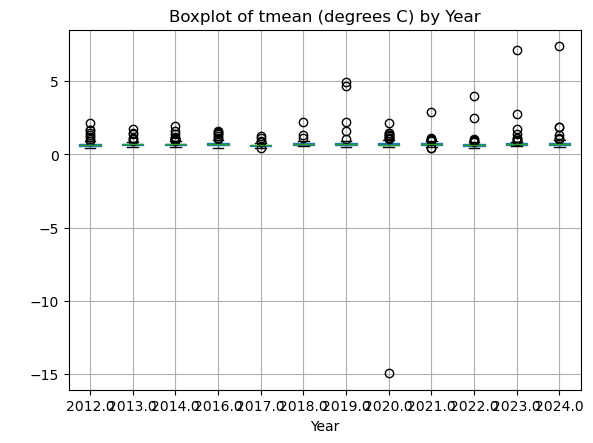

Year
2012.0    0.649621
2013.0    0.675903
2014.0    0.680547
2016.0    0.700679
2017.0    0.608036
2018.0    0.679369
2019.0    0.682403
2020.0    0.669355
2021.0    0.690967
2022.0    0.640984
2023.0    0.697448
2024.0    0.688768
Name: w_a, dtype: float64
Year
1995    1260.0
1996    1260.0
1997    1655.0
1998    1890.0
1999    2385.0
2000    1260.0
2001     964.5
2002    1420.0
2003    1260.0
2004    1110.0
2005    1170.0
2006    1335.0
2007    1120.0
2008    2085.0
2009    1350.0
2010    1315.0
2011    1410.0
2012    1210.0
2013     840.5
2014    1120.0
2015     869.0
2016     930.0
2017    1190.0
2018    1240.0
2019    1150.0
2020    1090.0
2021    1004.0
2022    1190.0
2023    1060.0
2024    1055.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
2012.0  0.649621      1210.0  7.098376
2013.0  0.675903       840.5  6.733997
2014.0  0.680547      1120.0  7.021084
2016.0  0.700679       930.0  6.835185
2017.0  0.608036   

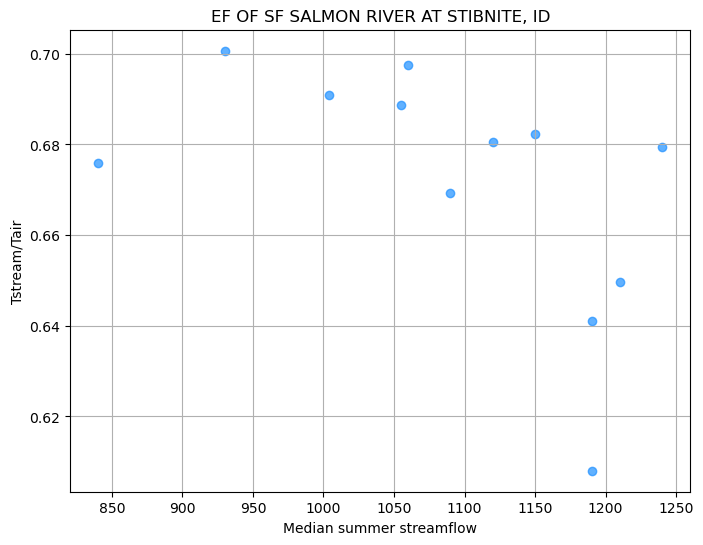

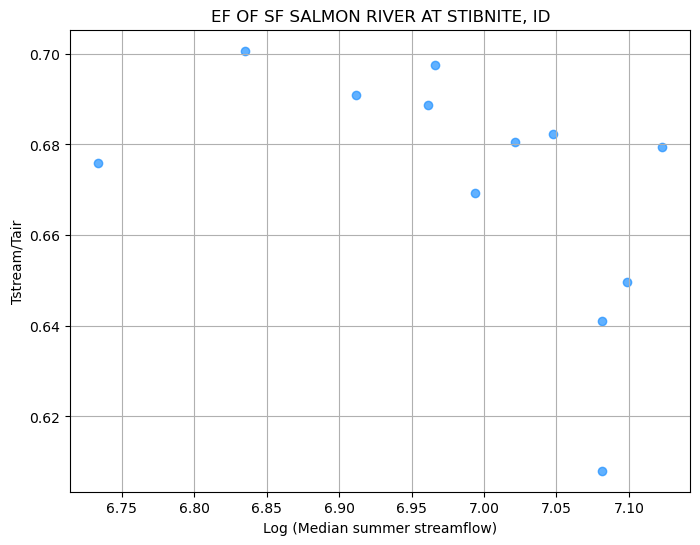

In [8]:
for site in siteNumber: # prism_df["site_no"].unique(): #
    print(site)
    print( type(site) ) 

    prism_df2 = prism_df[prism_df["site_no"] == site ]

    prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
    prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )

    print( prism_df2   )
    
# Fit the linear regression model
    model = smf.ols('tmean ~ sin_rday + cos_rday', data= prism_df2 ).fit()
    prism_df2['fit'] = model.predict( prism_df2 )
# Print the summary of the model
    print(model.summary())

    plt.figure(figsize=(10, 5))
    plt.plot( prism_df2['date'],  prism_df2['fit'], label='Fit', color='dodgerblue', alpha=0.8)
    plt.scatter( prism_df2['date'],  prism_df2['tmean'], label=' ', color='green', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Fit Value')
    plt.title('Fit vs Date')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])
    dailyStreamtemp_df["site_no"] = dailyStreamtemp_df["site_no"].astype(str)
    dailyStreamtemp_df2=dailyStreamtemp_df[ dailyStreamtemp_df['site_no'] == site        ]
    print(     "dailyStreamtemp_df2:",    dailyStreamtemp_df2 )
    merged_df = pd.merge( prism_df2,  dailyStreamtemp_df2,     left_on='date', right_on='Date',  how='outer')
    merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )    ]
    print( merged_df.head()         )

    sns.scatterplot(data= merged_df,  x='tmean', y='00010_Mean', hue='Year')
    merged_df["w_a"] = merged_df["00010_Mean"]/merged_df["tmean"]
    #merged_df["w_a"] 
    plt.figure(figsize=(8, 6))
    merged_df.boxplot(column="w_a", by='Year', patch_artist=True)

# Set plot title and labels
    plt.title('Boxplot of tmean (degrees C) by Year')
    plt.suptitle('')  # To remove the default "Boxplot" title
    plt.xlabel('Year')
    plt.ylabel(' ')

# Show the plot
    plt.show()

    median_buffer = merged_df.groupby('Year')["w_a"].median()


    print(median_buffer)

    median_Q = dailyStreamflow_df.groupby('Year')["00060_Mean"].median()


    print(median_Q)

    Q_buffer = pd.merge( median_buffer,  median_Q, on='Year')

    Q_buffer["log_Q"] =np.log(    Q_buffer["00060_Mean"] )
    
    print( Q_buffer)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['00060_Mean'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    site_info_df2=site_info_df[site_info_df["site_no"] == site     ]
    plt.title(  site_info_df2['station_nm'].iloc[0]  )
    plt.xlabel('Median summer streamflow')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['log_Q'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    plt.title(  site_info_df2['station_nm'].iloc[0]  )
    plt.xlabel('Log (Median summer streamflow)')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)
    

In [9]:
site_info_df2['station_nm'].iloc[0]

'EF OF SF SALMON RIVER AT STIBNITE, ID'